# TLG Financial Statement Analysis 2019 and 2020

# Import Libraries and Data Set

In [172]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

In [535]:
TLGData = pd.read_excel("BI5_Data_Round1.xlsx", sheet_name=None)

In [536]:
TLGarray = TLGData.pop('Data')

In [537]:
TLGdataframe = pd.DataFrame(TLGarray)

In [538]:
TLGdataframe.head()

,Kỳ,Mã sản phẩm,Tên sản phẩm,Nhóm SP - Cấp 1,Tên Nhóm SP - Cấp 1,Nhóm SP - Cấp 2,Tên Nhóm SP - Cấp 2,Nhóm SP - Cấp 3,Tên Nhóm SP - Cấp 3,Nhóm SP - Cấp 4,...,Kênh phân phối,Tên Kênh phân phối,Nhóm bán hàng,Tên Nhóm bán hàng,Vùng bán hàng,Tên Vùng bán hàng,Số lượng,Doanh thu,Giá vốn,Chi phí
0,1.202,50000008,Bút TL023 đen-hộp 20 cây,1.0,NHÓM BÚT VIẾT,1002,BÚT BI,10020001,BÚT BI,100200010001,...,10,General Trade,140.0,Miền Nam 1,100013,MN1-Khu vực 2,20494.0,40988000.0,28691600.00,7295814.0
1,1.202,50000010,Bút TL023 đỏ-hộp 20 cây,1.0,NHÓM BÚT VIẾT,1002,BÚT BI,10020001,BÚT BI,100200010001,...,10,General Trade,140.0,Miền Nam 1,100013,MN1-Khu vực 2,3088.0,6176000.0,4384960.00,1099321.0
2,1.202,50000015,Bút TL023 xanh-hộp 20 cây,1.0,NHÓM BÚT VIẾT,1002,BÚT BI,10020001,BÚT BI,100200010001,...,10,General Trade,140.0,Miền Nam 1,100013,MN1-Khu vực 2,20530.0,41060000.0,29563200.00,7308630.0
3,1.202,50000025,Bút TL025 đen-hộp 20 cây,1.0,NHÓM BÚT VIẾT,1002,BÚT BI,10020001,BÚT BI,100200010003,...,10,General Trade,140.0,Miền Nam 1,100013,MN1-Khu vực 2,1106.0,2614584.0,1908646.32,465393.0
4,1.202,50000027,Bút TL025 đỏ-hộp 20 cây,1.0,NHÓM BÚT VIẾT,1002,BÚT BI,10020001,BÚT BI,100200010003,...,10,General Trade,140.0,Miền Nam 1,100013,MN1-Khu vực 2,309.0,730476.0,540552.24,130024.0


A quick description of the data using `info`method, in particular the total number of rows, and each attribute’s type and number of non-null values.

In [539]:
TLGdataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90715 entries, 0 to 90714
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Kỳ                   90715 non-null  float64
 1   Mã sản phẩm          90715 non-null  int64  
 2   Tên sản phẩm         90714 non-null  object 
 3   Nhóm SP - Cấp 1      90714 non-null  float64
 4   Tên Nhóm SP - Cấp 1  90714 non-null  object 
 5   Nhóm SP - Cấp 2      90715 non-null  int64  
 6   Tên Nhóm SP - Cấp 2  90714 non-null  object 
 7   Nhóm SP - Cấp 3      90715 non-null  int64  
 8   Tên Nhóm SP - Cấp 3  90710 non-null  object 
 9   Nhóm SP - Cấp 4      90715 non-null  int64  
 10  Tên Nhóm SP - Cấp 4  90713 non-null  object 
 11  Kênh phân phối       90715 non-null  int64  
 12  Tên Kênh phân phối   90711 non-null  object 
 13  Nhóm bán hàng        90714 non-null  float64
 14  Tên Nhóm bán hàng    90714 non-null  object 
 15  Vùng bán hàng        90715 non-null 

The column names are in Vietnamese, so I decided to change it to English and make the paper much more understandable

In [540]:
TLGdataframe.columns = ['Period', 'Product ID','Product Name','Product Group - Level 1', 'Product Group Name - Level 1','Product Group - Level 2', 'Product Group Name - Level 2','Product Group - Level 3', 'Product Group Name - Level 3','Product Group - Level 4', 'Product Group Name - Level 4', 'Distribution', 'Distribution Method', 'Sale', 'Sale Name', 'Region', 'Region Name', 'Number of Product', 'Revenue', 'Cost price', 'Expenses'] 

In [541]:
TLGdataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90715 entries, 0 to 90714
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Period                        90715 non-null  float64
 1   Product ID                    90715 non-null  int64  
 2   Product Name                  90714 non-null  object 
 3   Product Group - Level 1       90714 non-null  float64
 4   Product Group Name - Level 1  90714 non-null  object 
 5   Product Group - Level 2       90715 non-null  int64  
 6   Product Group Name - Level 2  90714 non-null  object 
 7   Product Group - Level 3       90715 non-null  int64  
 8   Product Group Name - Level 3  90710 non-null  object 
 9   Product Group - Level 4       90715 non-null  int64  
 10  Product Group Name - Level 4  90713 non-null  object 
 11  Distribution                  90715 non-null  int64  
 12  Distribution Method           90711 non-null  object 
 13  S

# Adding new variables

In [542]:
TLGdataframe = TLGdataframe.dropna()

In [543]:
TLGdataframe['Price'] = TLGdataframe['Revenue']/TLGdataframe['Number of Product']

In [544]:
TLGdataframe['Profit'] = TLGdataframe['Revenue'] - TLGdataframe['Cost price'] - TLGdataframe['Expenses']

In [545]:
TLGdataframe['PercentageProfit'] = TLGdataframe['Profit']/TLGdataframe['Revenue']*100

In [546]:
def Profit_Loss (row):
    if row['Profit'] > 0:
        return 'Profit'
    return 'Loss'
TLGdataframe['Profit_Loss'] = TLGdataframe.apply (lambda row: Profit_Loss(row), axis=1)

In [547]:
def retrieve_year(number):
    number_s = str(number)
    flag = False
    ret = str()
    for c in number_s:
        if flag:
            ret += c
        if c == '.':
            flag = True
    while len(ret) < 4:
        ret += '0'
    return ret

TLGdataframe['Year'] = TLGdataframe['Period'].apply(retrieve_year)

In [548]:
TLGdataframe['Year'].value_counts()

2020    45125
2019    34109
2021    11454
Name: Year, dtype: int64

In [549]:
TLGdataframe.head()

,Period,Product ID,Product Name,Product Group - Level 1,Product Group Name - Level 1,Product Group - Level 2,Product Group Name - Level 2,Product Group - Level 3,Product Group Name - Level 3,Product Group - Level 4,...,Region Name,Number of Product,Revenue,Cost price,Expenses,Price,Profit,PercentageProfit,Profit_Loss,Year
0,1.202,50000008,Bút TL023 đen-hộp 20 cây,1.0,NHÓM BÚT VIẾT,1002,BÚT BI,10020001,BÚT BI,100200010001,...,MN1-Khu vực 2,20494.0,40988000.0,28691600.00,7295814.0,2000.0,5000586.00,12.200122,Profit,2020
1,1.202,50000010,Bút TL023 đỏ-hộp 20 cây,1.0,NHÓM BÚT VIẾT,1002,BÚT BI,10020001,BÚT BI,100200010001,...,MN1-Khu vực 2,3088.0,6176000.0,4384960.00,1099321.0,2000.0,691719.00,11.200113,Profit,2020
2,1.202,50000015,Bút TL023 xanh-hộp 20 cây,1.0,NHÓM BÚT VIẾT,1002,BÚT BI,10020001,BÚT BI,100200010001,...,MN1-Khu vực 2,20530.0,41060000.0,29563200.00,7308630.0,2000.0,4188170.00,10.200122,Profit,2020
3,1.202,50000025,Bút TL025 đen-hộp 20 cây,1.0,NHÓM BÚT VIẾT,1002,BÚT BI,10020001,BÚT BI,100200010003,...,MN1-Khu vực 2,1106.0,2614584.0,1908646.32,465393.0,2364.0,240544.68,9.200113,Profit,2020
4,1.202,50000027,Bút TL025 đỏ-hộp 20 cây,1.0,NHÓM BÚT VIẾT,1002,BÚT BI,10020001,BÚT BI,100200010003,...,MN1-Khu vực 2,309.0,730476.0,540552.24,130024.0,2364.0,59899.76,8.200100,Profit,2020


After adding new variables, we takes a quick look at our data frame again

# Descriptive Analytics and Diagnostic analytics

## Revenue and Profit distribution

In [550]:
YearRevenue = TLGdataframe.groupby(['Year'])\
.agg(YearRevenue = ('Revenue', sum)).reset_index()

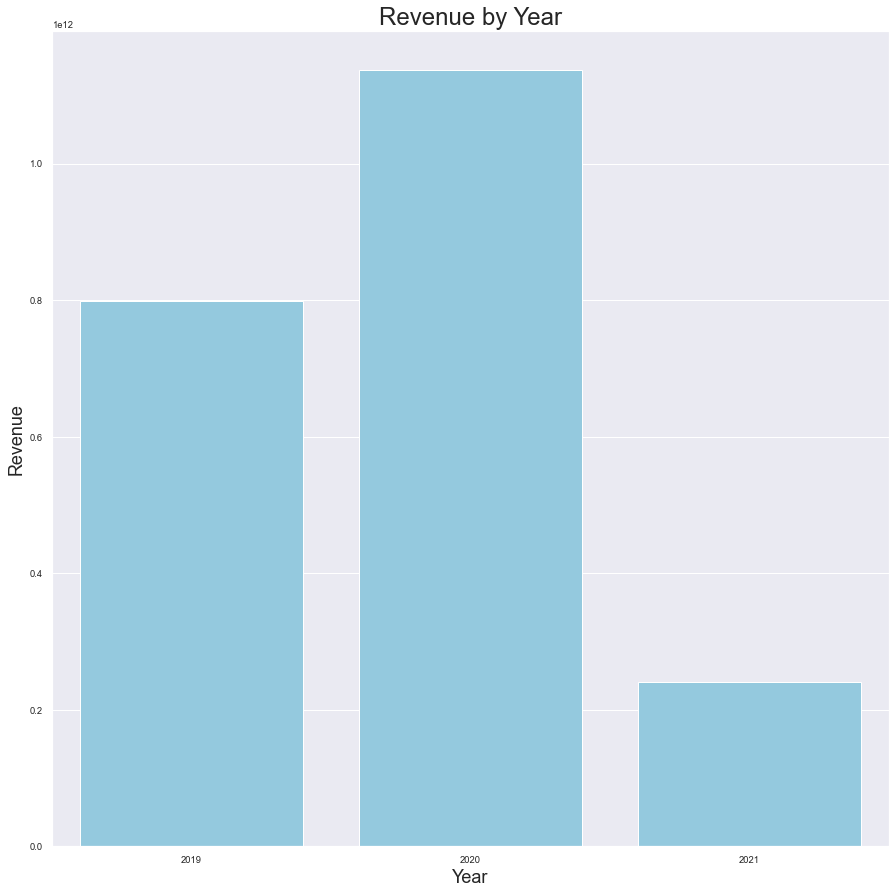

In [551]:
sns.set(rc={'figure.figsize':(15,15)})
sns.set(font_scale = 0.85)
sns.barplot(x='Year',
            y="YearRevenue", 
            data=YearRevenue, 
            color = 'skyblue')
plt.xticks(rotation=0)
plt.title("Revenue by Year", fontsize=24)
plt.xlabel('Year',fontsize=18) 
plt.ylabel('Revenue',fontsize=18)
plt.show()

In [552]:
MonthlyRevenue = TLGdataframe.groupby(['Period'])\
.agg(MonthlyRevenue = ('Revenue', sum)).reset_index()

In [553]:
MonthlyRevenue.sort_values('Period')

,Period,MonthlyRevenue
0,1.2020,6.291771e+10
1,1.2021,8.508887e+10
2,2.2020,7.154573e+10
3,2.2021,5.311576e+10
4,3.2020,1.355109e+11
5,3.2021,1.031427e+11
6,4.2019,5.384941e+10
7,4.2020,7.068263e+10
8,5.2019,6.829786e+10
9,5.2020,9.294402e+10


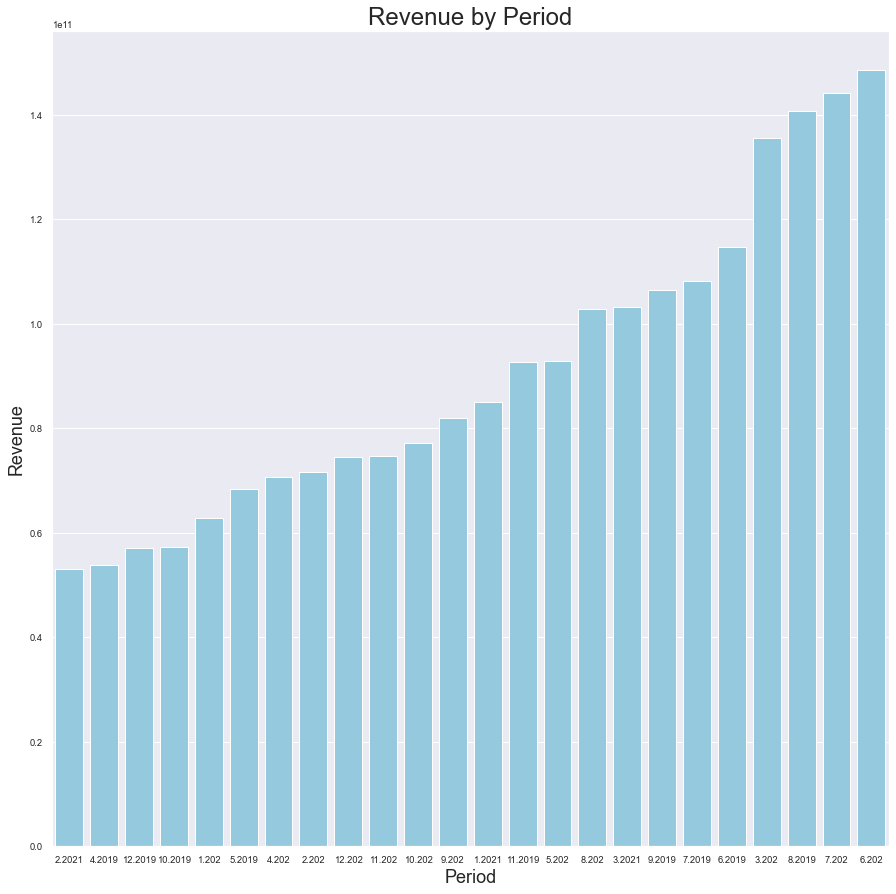

In [554]:
sns.set(rc={'figure.figsize':(15,15)})
sns.set(font_scale = 0.85)
sns.barplot(x='Period',
            y="MonthlyRevenue", 
            data=MonthlyRevenue, 
            order=MonthlyRevenue.sort_values('MonthlyRevenue').Period, color = 'skyblue')
plt.xticks(rotation=0)
plt.title("Revenue by Period", fontsize=24)
plt.xlabel('Period',fontsize=18) 
plt.ylabel('Revenue',fontsize=18)
plt.show()

In [555]:
MonthlyProfit = TLGdataframe.groupby(['Period'])\
.agg(MonthlyProfit = ('Profit', sum)).reset_index()

In [556]:
MonthlyProfit.sort_values('MonthlyProfit')

,Period,MonthlyProfit
3,2.2021,4.562300e+09
6,4.2019,4.612101e+09
21,11.2020,4.641034e+09
18,10.2019,4.926086e+09
22,12.2019,4.933902e+09
7,4.2020,5.149715e+09
2,2.2020,5.396426e+09
23,12.2020,5.430625e+09
0,1.2020,5.463040e+09
19,10.2020,5.845882e+09


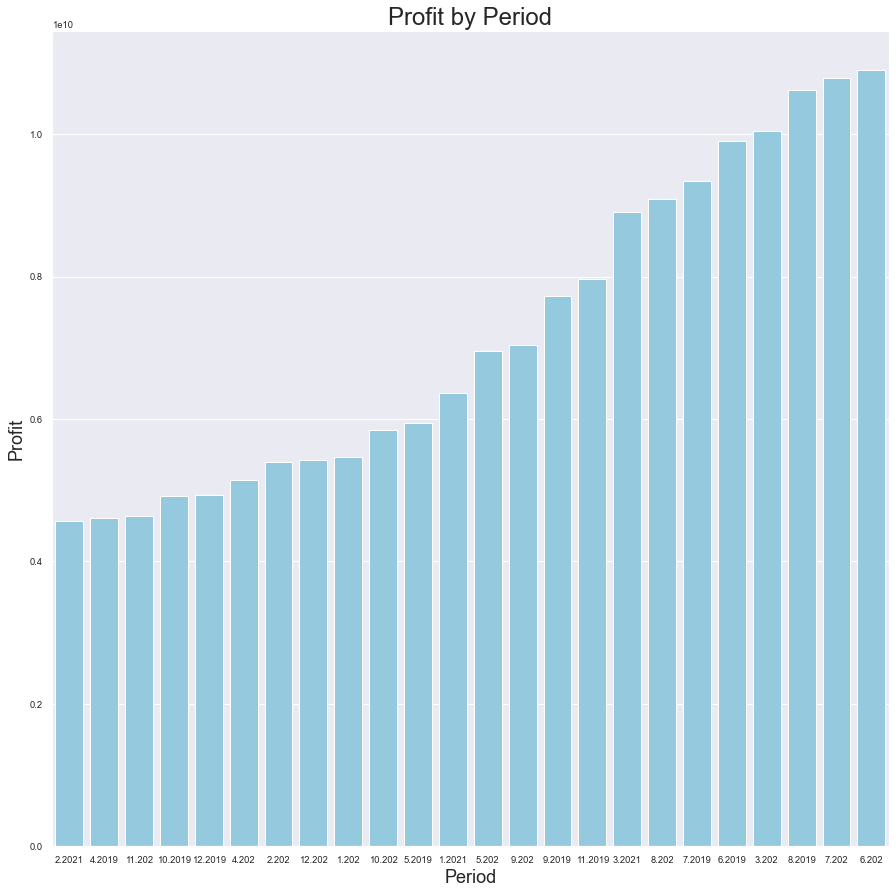

In [557]:
sns.barplot(x='Period',
            y="MonthlyProfit", 
            data=MonthlyProfit, 
            order=MonthlyProfit.sort_values('MonthlyProfit').Period, color = 'skyblue')
plt.xticks(rotation=0)
plt.title("Profit by Period", fontsize=24)
plt.xlabel('Period',fontsize=18) 
plt.ylabel('Profit',fontsize=18)
plt.show()

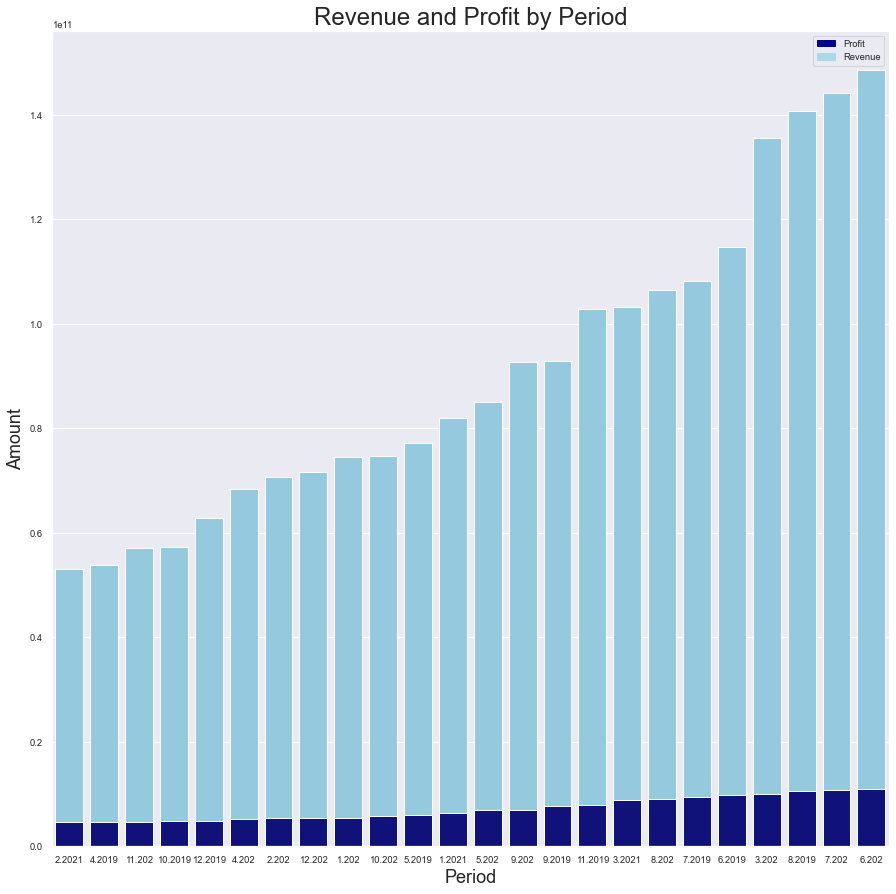

In [558]:
sns.set(rc={'figure.figsize':(15,15)})
sns.set(font_scale = 0.85)
sns.barplot(x='Period',
            y="MonthlyRevenue", 
            data=MonthlyRevenue, 
            order=MonthlyRevenue.sort_values('MonthlyRevenue').Period, color = 'skyblue')
sns.barplot(x='Period',
            y="MonthlyProfit", 
            data=MonthlyProfit, 
            order=MonthlyProfit.sort_values('MonthlyProfit').Period, color = 'darkblue')
plt.xticks(rotation=0)
plt.title("Revenue and Profit by Period", fontsize=24)
plt.xlabel('Period',fontsize=18) 
plt.ylabel('Amount',fontsize=18)
import matplotlib.patches as mpatches
top_bar = mpatches.Patch(color='darkblue', label='Profit')
bottom_bar = mpatches.Patch(color='lightblue', label='Revenue')
plt.legend(handles=[top_bar, bottom_bar])
plt.show()

In [559]:
RevenueProfit = pd.merge(MonthlyProfit,MonthlyRevenue)
RevenueProfit['MonthlyPercentageProfit'] = RevenueProfit['MonthlyProfit']/ RevenueProfit['MonthlyRevenue']*100 
RevenueProfit

,Period,MonthlyProfit,MonthlyRevenue,MonthlyPercentageProfit
0,1.2020,5.463040e+09,6.291771e+10,8.682833
1,1.2021,6.359192e+09,8.508887e+10,7.473588
2,2.2020,5.396426e+09,7.154573e+10,7.542625
3,2.2021,4.562300e+09,5.311576e+10,8.589353
4,3.2020,1.004341e+10,1.355109e+11,7.411519
5,3.2021,8.911177e+09,1.031427e+11,8.639658
6,4.2019,4.612101e+09,5.384941e+10,8.564813
7,4.2020,5.149715e+09,7.068263e+10,7.285686
8,5.2019,5.942674e+09,6.829786e+10,8.701113
9,5.2020,6.961442e+09,9.294402e+10,7.489930


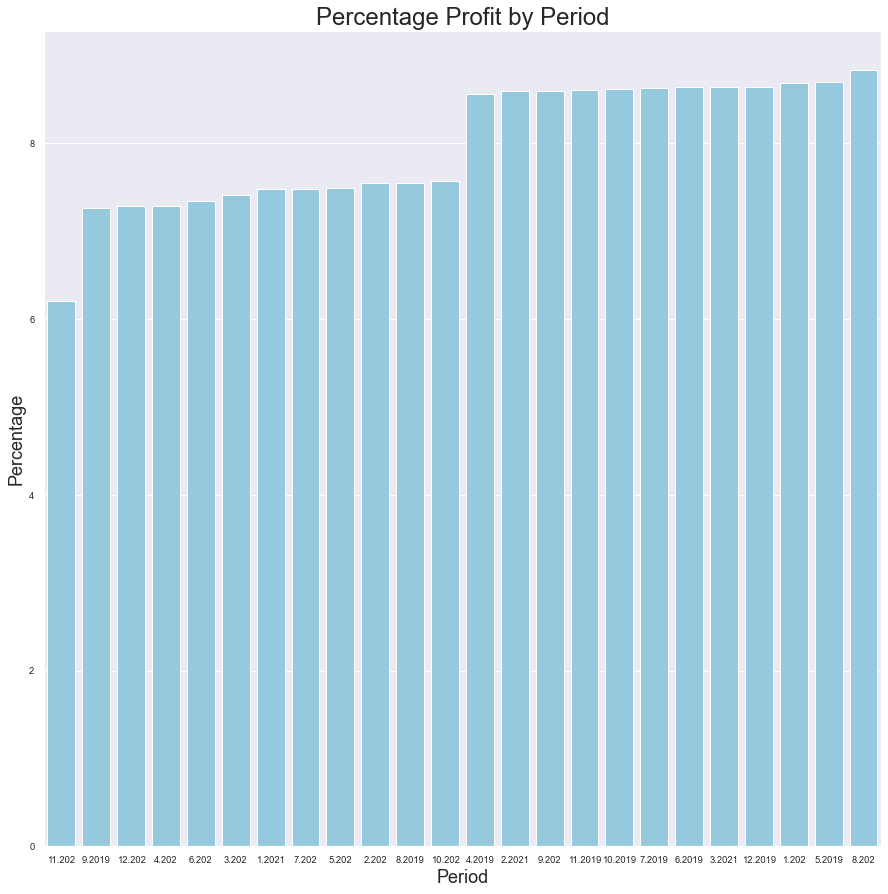

In [560]:
sns.barplot(x='Period',
            y="MonthlyPercentageProfit", 
            data=RevenueProfit, 
            order=RevenueProfit.sort_values('MonthlyPercentageProfit').Period, color = 'skyblue')
plt.title("Percentage Profit by Period", fontsize=24)
plt.xlabel('Period',fontsize=18) 
plt.ylabel('Percentage',fontsize=18)
plt.show()

This is a bar chart represents the percentages profit each period. First of all, this is a bimodal distribution, which indicates two separated groups of period, with an exception of November, 2020. The two peak of two group are about 7.5% and 8.7%. We continue to investigate more closely, the first group which has a smaller percentage profit contains: (9/2019, 12/2020, 4/2020, 6/2020, 3/2020, 1/2021, 7/2020, 5/2020, 2/2020, 10/2020 and 8/2019). Wow, overall the first group contains almost every month in 2020, and contains both period which hold the highest revenue and the highest profit amount (6/2020, 7/2020). Using the only two graph of Revenue Amount and the Profit Amount, we do not recognize the disadvantages that Covid-19 brings to Thien Long Group, but, with the fact the the smaller group contains almost every months since the Covid-19 emerged and the lowest percentage hold by November, 2020, it is inevitable to admit the negative effect of Covid 19 brought to Thien Long Group.

## Distribution of Percentage Profit

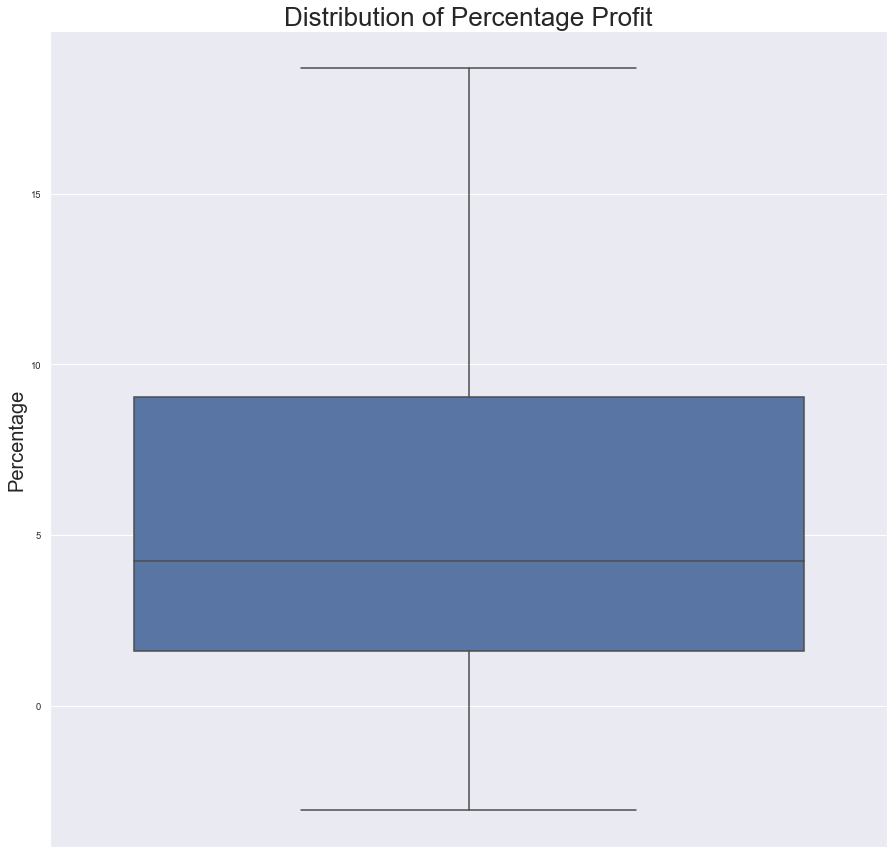

In [561]:
PercentageProfitPlot = sns.boxplot(y="PercentageProfit", data=TLGdataframe)
PercentageProfitPlot.set_ylabel("Percentage", fontsize=20)
PercentageProfitPlot.axes.set_title("Distribution of Percentage Profit", fontsize=26)
plt.show()

In [562]:
TLGdataframe['PercentageProfit'].max()

18.66411841728478

In [563]:
TLGdataframe['PercentageProfit'].min()

-3.0478111127116696

In [564]:
TLGdataframe['PercentageProfit'].max() - TLGdataframe['PercentageProfit'].min()

21.71192952999645

In [565]:
TLGdataframe['PercentageProfit'].mean()

5.511221352691429

In [566]:
TLGdataframe['PercentageProfit'].median()

4.2472189892385614

In [567]:
TLGdataframe['Profit_Loss'].value_counts()

Profit    79517
Loss      11171
Name: Profit_Loss, dtype: int64

This is the box plot represents the percentage profit by each product launch. In general, this is a right-skewed distribution with a center focus around 4 to 5 percentage (median = 4.247218611002404), suggesting that Thien Long Group can expect a 4.5% profit when we launch a new product in a period. Of all 90715 lauching, Thien Long Group gets a 87.7% profitable lauching, which means they almost get profit in every product they sold. To elaborated on this matter, the profit in these periods peaks at 18.7%, while it reach the lowest points of -3.05%, which created the range of 21.7%. This is a pretty small range, proving that Thien Long Group's products are sustainable and since there are no outliers in the graph, Thien Long Group will not be likely to expect a rocket increase or a massive loss when they running a new product.

## Revenue and Profit by Product Group Level 1

First, we take a look at all the Product Group Level 1 Name

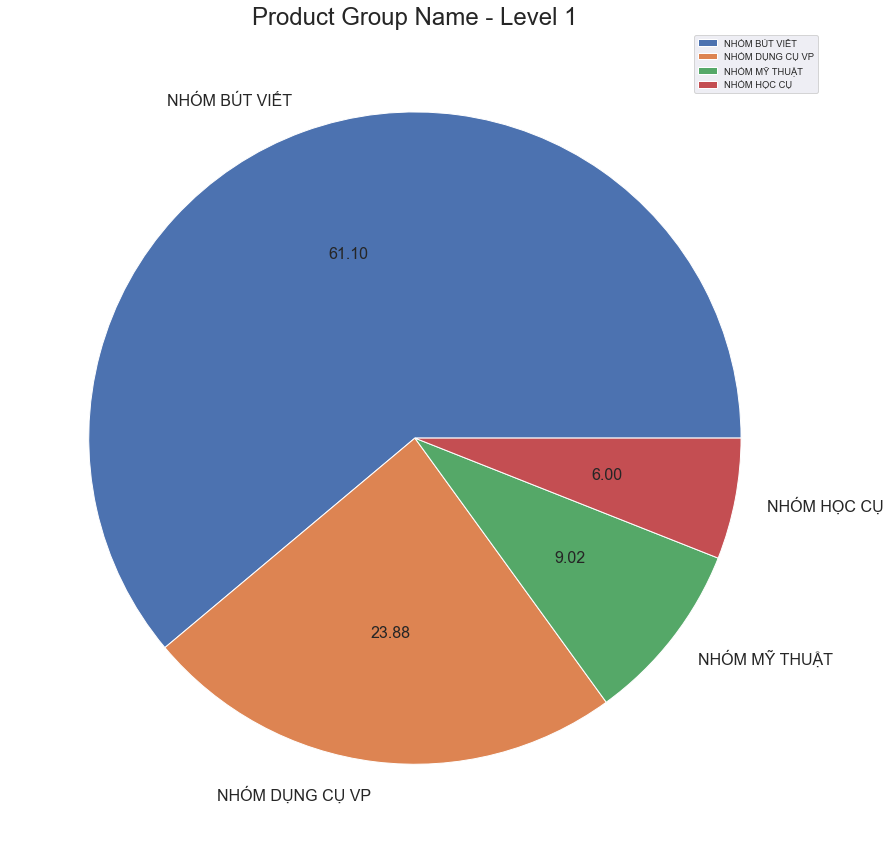

In [568]:
a = TLGdataframe['Product Group Name - Level 1'].value_counts()
a.plot(kind = 'pie', autopct='%.2f',textprops={'fontsize': 16})
plt.title("Product Group Name - Level 1", fontsize=24)
plt.ylabel('')
plt.legend()
plt.show()

In [569]:
Group1Revenue = TLGdataframe.groupby(['Product Group Name - Level 1'])\
.agg(Group1Revenue = ('Revenue', sum)).reset_index()

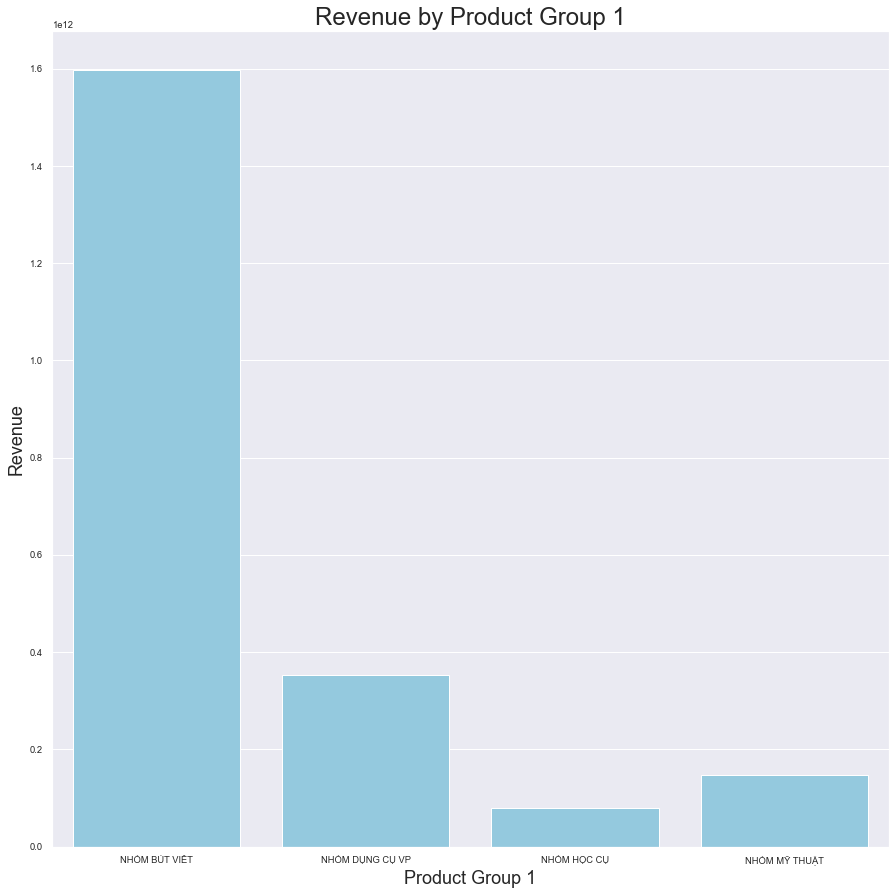

In [570]:
sns.barplot(x='Product Group Name - Level 1',
            y="Group1Revenue", 
            data=Group1Revenue, 
            color = 'skyblue')
plt.xticks(rotation=0)
plt.title("Revenue by Product Group 1", fontsize=24)
plt.xlabel('Product Group 1',fontsize=18) 
plt.ylabel('Revenue',fontsize=18)
plt.show()

In [571]:
Group1Profit = TLGdataframe.groupby(['Product Group Name - Level 1'])\
.agg(Group1Profit = ('Profit', sum)).reset_index()

In [572]:
Group1Profit

,Product Group Name - Level 1,Group1Profit
0,NHÓM BÚT VIẾT,1.278677e+11
1,NHÓM DỤNG CỤ VP,2.652274e+10
2,NHÓM HỌC CỤ,6.145833e+09
3,NHÓM MỸ THUẬT,1.203441e+10


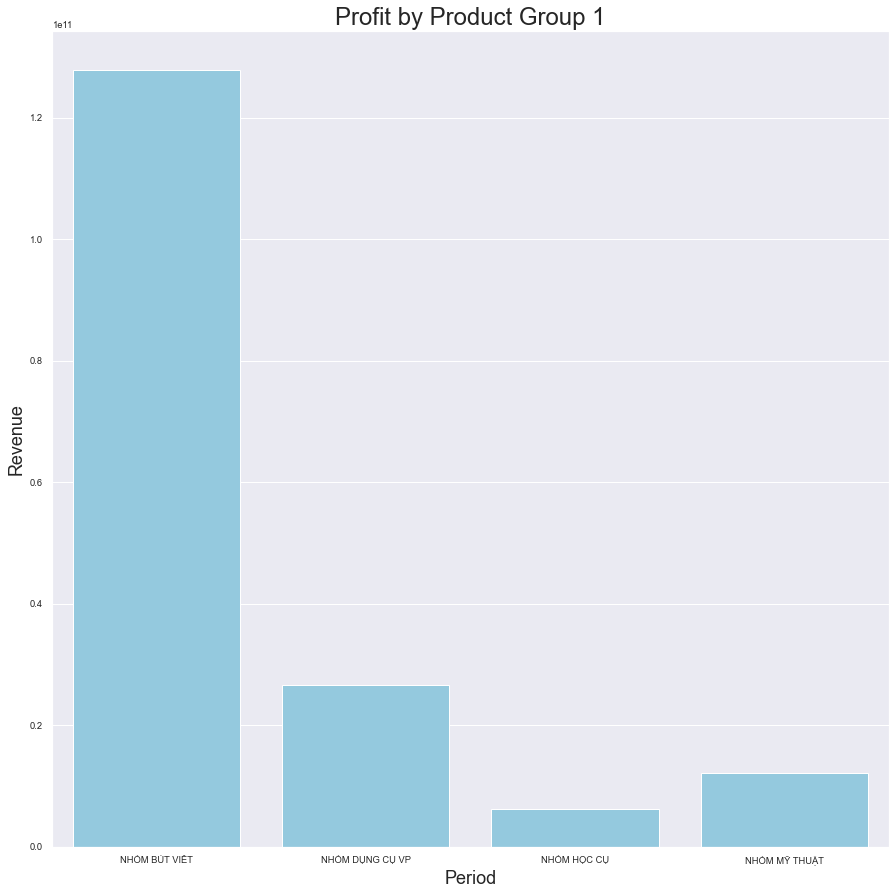

In [573]:
sns.barplot(x='Product Group Name - Level 1',
            y="Group1Profit", 
            data=Group1Profit, 
            color = 'skyblue')
plt.xticks(rotation=0)
plt.title("Profit by Product Group 1", fontsize=24)
plt.xlabel('Period',fontsize=18) 
plt.ylabel('Revenue',fontsize=18)
plt.show()

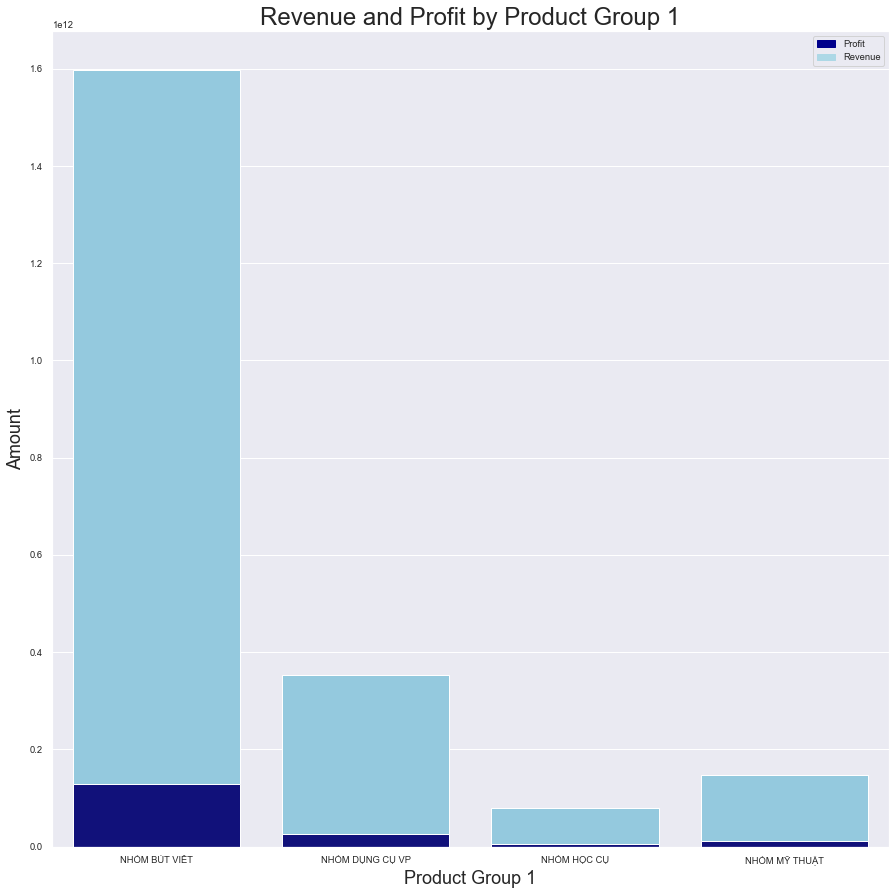

In [574]:
sns.set(rc={'figure.figsize':(15,15)})
sns.set(font_scale = 0.85)
sns.barplot(x='Product Group Name - Level 1',
            y="Group1Revenue", 
            data=Group1Revenue, 
            color = 'skyblue')
sns.barplot(x='Product Group Name - Level 1',
            y="Group1Profit", 
            data=Group1Profit, 
            color = 'darkblue')
plt.xticks(rotation=0)
plt.title("Revenue and Profit by Product Group 1", fontsize=24)
plt.xlabel('Product Group 1',fontsize=18) 
plt.ylabel('Amount',fontsize=18)
import matplotlib.patches as mpatches
top_bar = mpatches.Patch(color='darkblue', label='Profit')
bottom_bar = mpatches.Patch(color='lightblue', label='Revenue')
plt.legend(handles=[top_bar, bottom_bar])
plt.show()

In [575]:
Group1PercentageProfit = TLGdataframe.groupby(['Product Group Name - Level 1'])\
.agg(Group1PercentageProfit = ('PercentageProfit', 'mean')).reset_index()

In [576]:
Group1PercentageProfit

,Product Group Name - Level 1,Group1PercentageProfit
0,NHÓM BÚT VIẾT,5.518971
1,NHÓM DỤNG CỤ VP,5.419008
2,NHÓM HỌC CỤ,5.839457
3,NHÓM MỸ THUẬT,5.484585


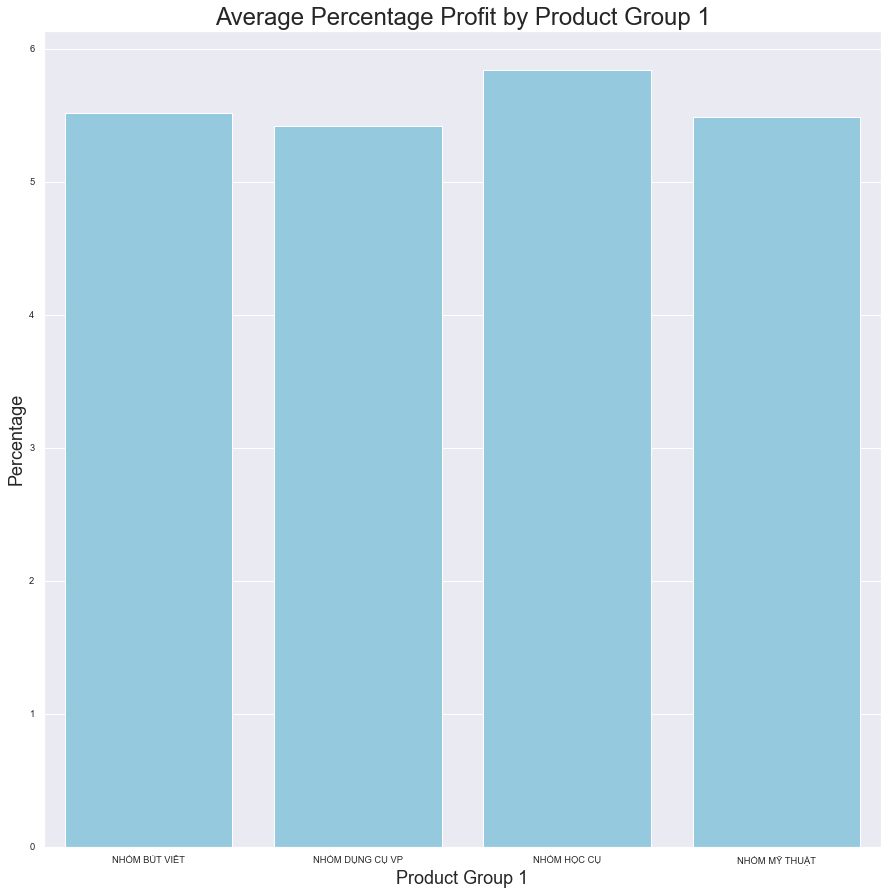

In [577]:
sns.barplot(x='Product Group Name - Level 1',
            y="Group1PercentageProfit", 
            data=Group1PercentageProfit, 
            color = 'skyblue')
plt.xticks(rotation=0)
plt.title("Average Percentage Profit by Product Group 1", fontsize=24)
plt.xlabel('Product Group 1',fontsize=18) 
plt.ylabel('Percentage',fontsize=18)
plt.show()

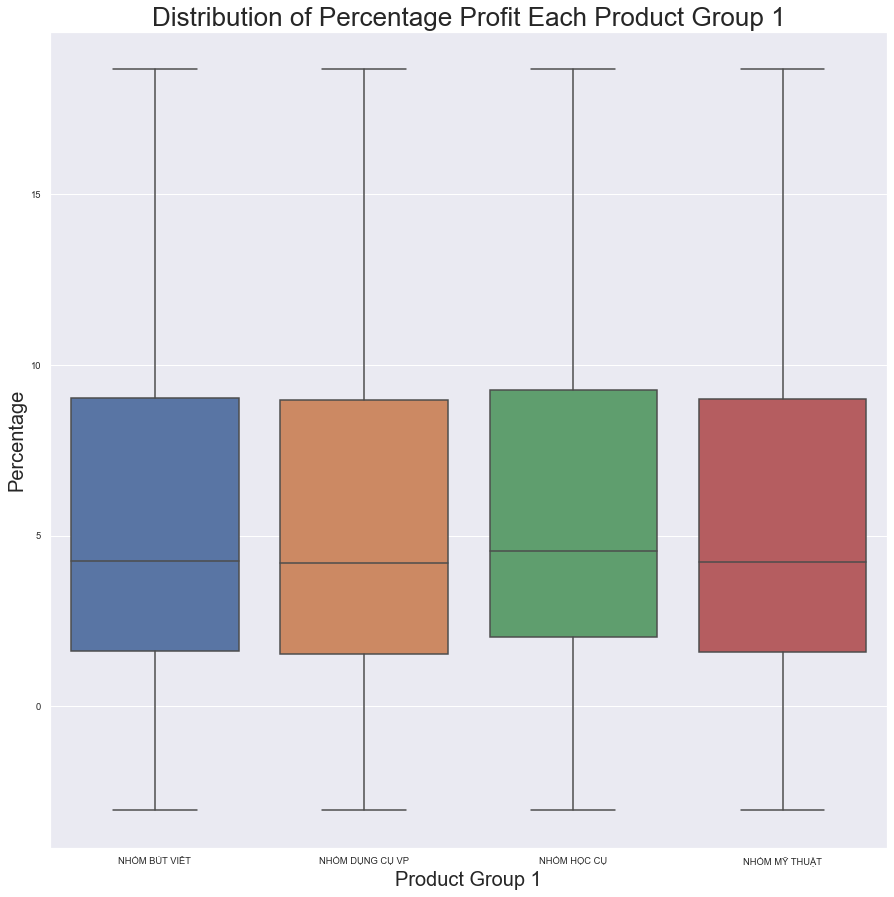

In [578]:
Group1BoxPlot = sns.boxplot(x="Product Group Name - Level 1", y="PercentageProfit", data=TLGdataframe)
Group1BoxPlot.set_xlabel("Product Group 1", fontsize=20)
Group1BoxPlot.set_ylabel("Percentage", fontsize=20)
Group1BoxPlot.axes.set_title("Distribution of Percentage Profit Each Product Group 1", fontsize=26)
plt.show()

From two plots above, in which displays the average of percentage profit of each product in the first group and the boxplot representing the distribution of the percentage, we do not really see a clear difference from these group. All the average is in the range of 5% and 6%, while these boxplots are really similar with a slightly right-skewed distribution. To test this claim, we conduct an One-Way ANOVA for comparing four means with the null hypothesis is there is no significant difference in the mean percentage among the first group and the alternative hypothesis is there exists a significant difference in the mean percentage. 

In [579]:
TLGdataframe['Product Group Name - Level 1'].value_counts()

NHÓM BÚT VIẾT      55412
NHÓM DỤNG CỤ VP    21653
NHÓM MỸ THUẬT       8184
NHÓM HỌC CỤ         5439
Name: Product Group Name - Level 1, dtype: int64

In [580]:
TLGdataframe = TLGdataframe.dropna()

In [581]:
TLGdataframe.rename(columns={'Product Group Name - Level 1':'ProductGroupNameLevel1'}, inplace=True)
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('PercentageProfit ~ ProductGroupNameLevel1', data=TLGdataframe).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
ProductGroupNameLevel1,7.792482e+02,3.0,10.287789,9.105009e-07
Residual,2.289619e+06,90684.0,NaN,NaN


The p-value of the test is 9.105009e-07, which is much less than the significance level alpha = 0.05. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random). Therefore, we reject the null hypothesis with f statistic is 10.287789 and conclude that there is significant difference in the percentage profit among Product Group 1. This goes against our assumption with the intial visualization, when the distribution of these graphs are really similar. To see the cause of this difference, let do another test of each group inside the first Group Product with the null hypothesis is there is no difference between two random groups and the alternative hypothesis is there exists a significant difference between two random groups.



In [582]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
mc = MultiComparison(TLGdataframe['PercentageProfit'], TLGdataframe['ProductGroupNameLevel1'])
tukey_result = mc.tukeyhsd(alpha=0.05)

print(tukey_result)
print('Unique Product Group 1: {}'.format(mc.groupsunique))

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
     group1          group2     meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------
  NHÓM BÚT VIẾT NHÓM DỤNG CỤ VP     -0.1 0.0627 -0.2034 0.0035  False
  NHÓM BÚT VIẾT     NHÓM HỌC CỤ   0.3205  0.001  0.1371 0.5039   True
  NHÓM BÚT VIẾT   NHÓM MỸ THUẬT  -0.0344    0.9 -0.1873 0.1185  False
NHÓM DỤNG CỤ VP     NHÓM HỌC CỤ   0.4204  0.001  0.2247 0.6162   True
NHÓM DỤNG CỤ VP   NHÓM MỸ THUẬT   0.0656 0.7206 -0.1019 0.2331  False
    NHÓM HỌC CỤ   NHÓM MỸ THUẬT  -0.3549  0.001 -0.5807 -0.129   True
---------------------------------------------------------------------
Unique Product Group 1: ['NHÓM BÚT VIẾT' 'NHÓM DỤNG CỤ VP' 'NHÓM HỌC CỤ' 'NHÓM MỸ THUẬT']


So from 6 tests, 3 tests return value `True`. Specifically, all tests that return the result of rejecting the null hypothesis have the involvement of `NHÓM HỌC CỤ` - `SCHOOL SUPPLIES`, which also has the highest Percentage Profit in the period we investigate. Among all the other tests, the results have claimed that there is no significant difference between them.  

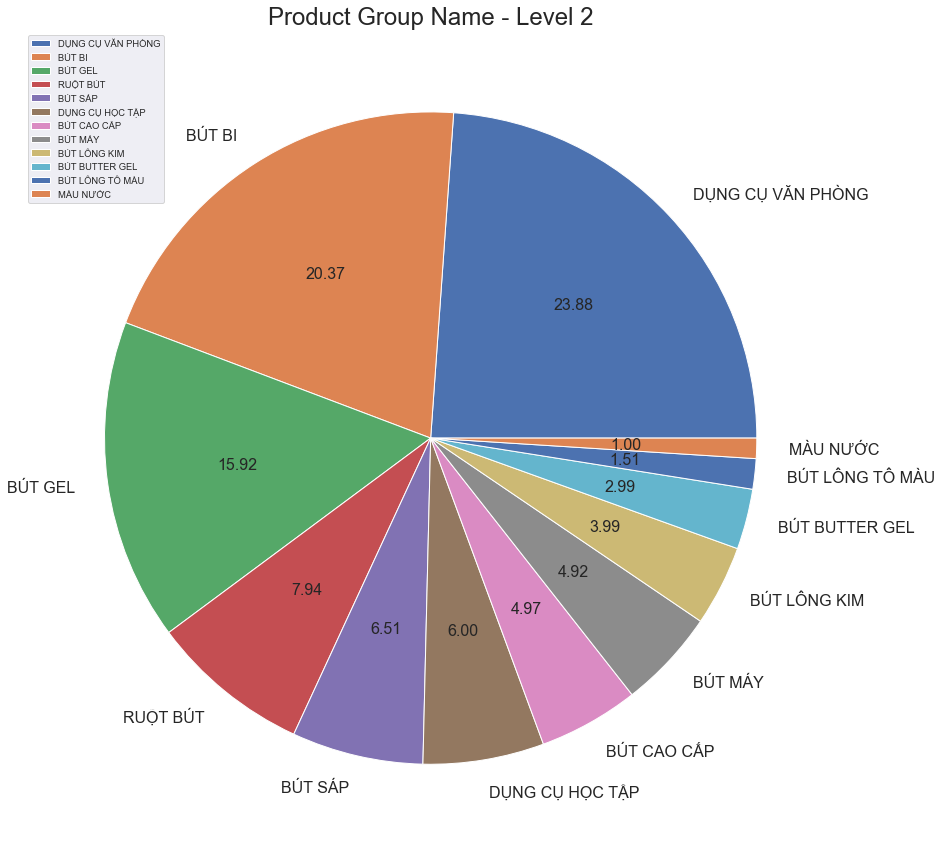

In [583]:
Group2Plot = TLGdataframe['Product Group Name - Level 2'].value_counts()
Group2Plot.plot(kind = 'pie', autopct='%.2f',textprops={'fontsize': 16})
plt.title("Product Group Name - Level 2", fontsize=24)
plt.ylabel('')
plt.legend(loc='upper left')
plt.show()

In [584]:
Group2Revenue = TLGdataframe.groupby(['Product Group Name - Level 2'])\
.agg(Group2Revenue = ('Revenue', sum)).reset_index()

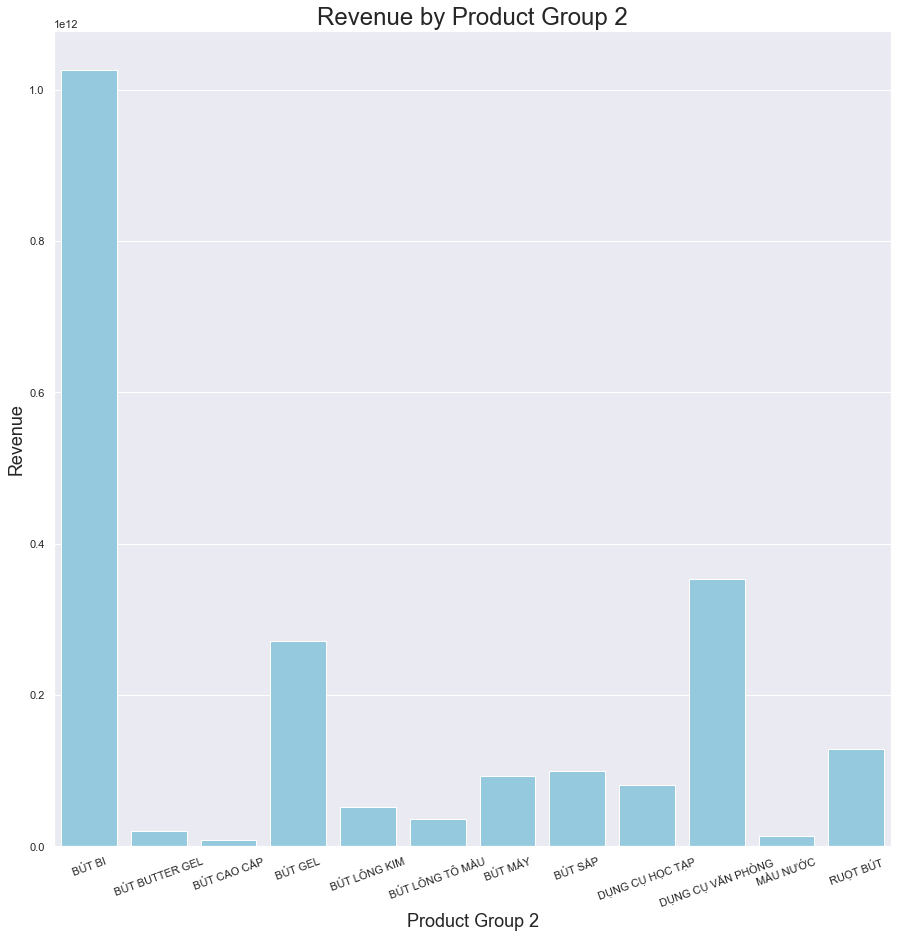

In [585]:
sns.set(font_scale = 1)
sns.barplot(x='Product Group Name - Level 2',
            y="Group2Revenue", 
            data=Group2Revenue, 
            color = 'skyblue')
plt.xticks(rotation=20)
plt.title("Revenue by Product Group 2", fontsize=24)
plt.xlabel('Product Group 2',fontsize=18) 
plt.ylabel('Revenue',fontsize=18)
plt.show()

In [586]:
Group2Profit = TLGdataframe.groupby(['Product Group Name - Level 2'])\
.agg(Group2Profit = ('Profit', sum)).reset_index()

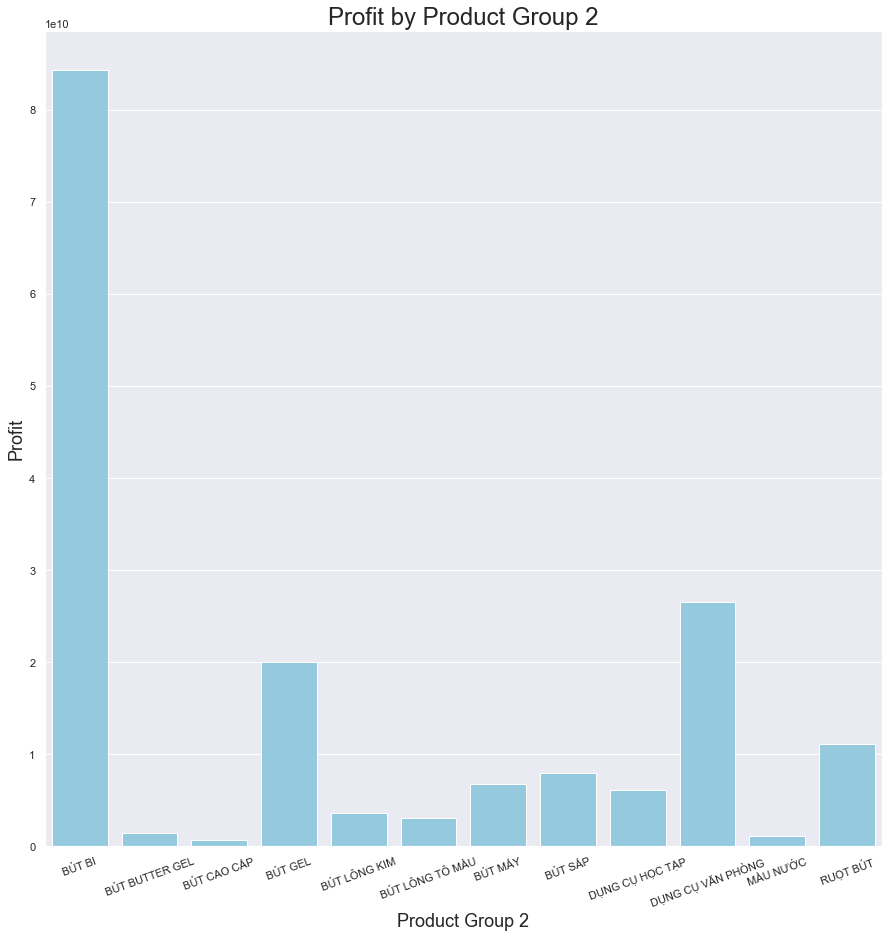

In [587]:
sns.barplot(x='Product Group Name - Level 2',
            y="Group2Profit", 
            data=Group2Profit, 
            color = 'skyblue')
plt.xticks(rotation=20)
plt.title("Profit by Product Group 2", fontsize=24)
plt.xlabel('Product Group 2',fontsize=18) 
plt.ylabel('Profit',fontsize=18)
plt.show()

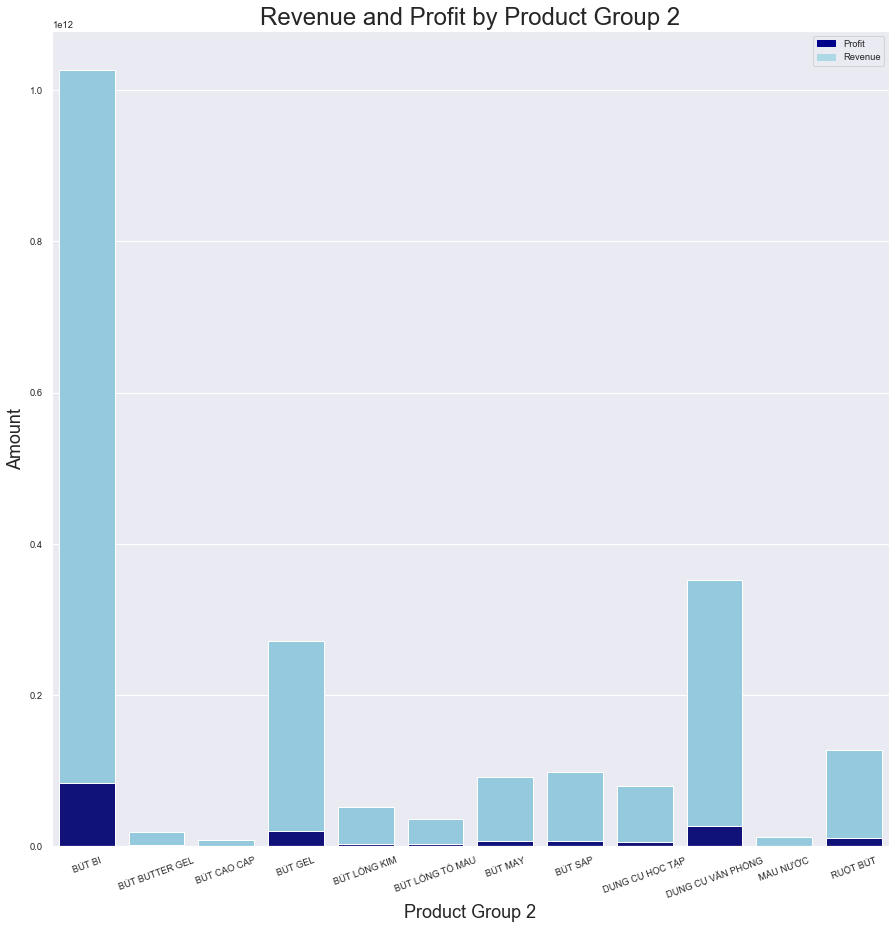

In [588]:
sns.set(rc={'figure.figsize':(15,15)})
sns.set(font_scale = 0.85)
sns.barplot(x='Product Group Name - Level 2',
            y="Group2Revenue", 
            data=Group2Revenue, 
            color = 'skyblue')
sns.barplot(x='Product Group Name - Level 2',
            y="Group2Profit", 
            data=Group2Profit, 
            color = 'darkblue')
plt.xticks(rotation=20)
plt.title("Revenue and Profit by Product Group 2", fontsize=24)
plt.xlabel('Product Group 2',fontsize=18) 
plt.ylabel('Amount',fontsize=18)
import matplotlib.patches as mpatches
top_bar = mpatches.Patch(color='darkblue', label='Profit')
bottom_bar = mpatches.Patch(color='lightblue', label='Revenue')
plt.legend(handles=[top_bar, bottom_bar])
plt.show()

In [589]:
Group2PercentageProfit = TLGdataframe.groupby(['Product Group Name - Level 2'])\
.agg(Group2PercentageProfit = ('PercentageProfit', 'mean')).reset_index()

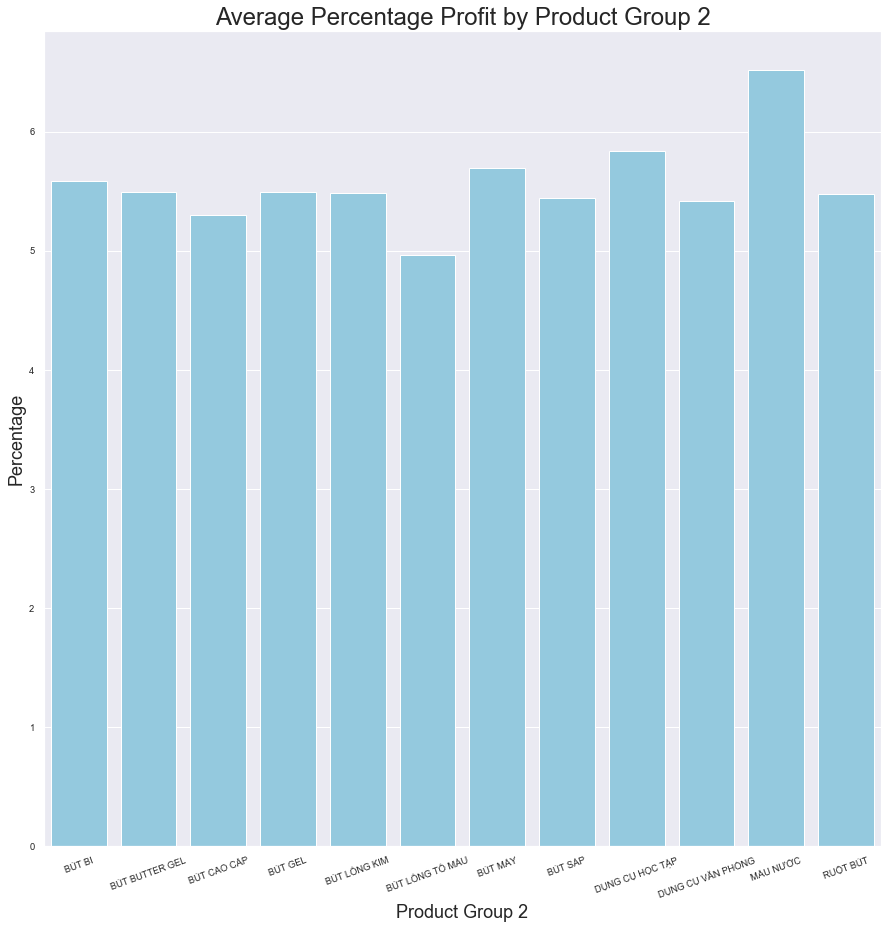

In [590]:
sns.barplot(x='Product Group Name - Level 2',
            y="Group2PercentageProfit", 
            data=Group2PercentageProfit, 
            color = 'skyblue')
plt.xticks(rotation=20)
plt.title("Average Percentage Profit by Product Group 2", fontsize=24)
plt.xlabel('Product Group 2',fontsize=18) 
plt.ylabel('Percentage',fontsize=18)
plt.show()

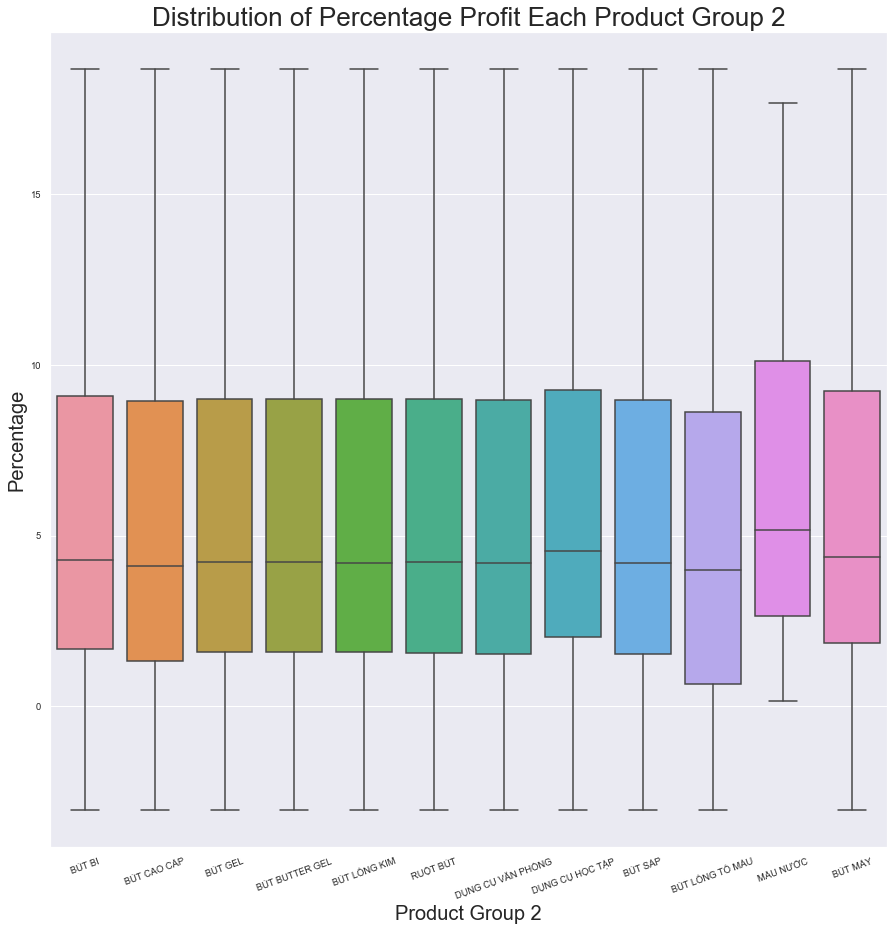

In [591]:
Group2BoxPlot = sns.boxplot(x="Product Group Name - Level 2", y="PercentageProfit", data=TLGdataframe)
plt.xticks(rotation=20)
Group2BoxPlot.set_xlabel("Product Group 2", fontsize=20)
Group2BoxPlot.set_ylabel("Percentage", fontsize=20)
Group2BoxPlot.axes.set_title("Distribution of Percentage Profit Each Product Group 2", fontsize=26)
plt.show()

From two plots above, in which displays the average of percentage profit of each product in the second group and the boxplot representing the distribution of the percentage, we notice a slightly difference from these group. All the average is in the range of 5% and 6%, with two exceptional of 'BÚT LÔNG TÔ MÀU' fall slightly below 5% and 'MÀU NƯỚC' reach a peak at 6.5% percentage profit. These boxplots are really similar with a slightly right-skewed distribution, specially, 'MÀU NƯỚC' has not experienced losses during the period. To test this claim, we conduct an One-Way ANOVA for comparing these means with the null hypothesis is there is no significant difference in the mean percentage among the second group and the alternative hypothesis is there exists a significant difference in the mean percentage. 

In [592]:
TLGdataframe.rename(columns={'Product Group Name - Level 2':'ProductGroupNameLevel2'}, inplace=True)
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('PercentageProfit ~ ProductGroupNameLevel2', data=TLGdataframe).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
ProductGroupNameLevel2,2.589055e+03,11.0,9.328699,5.543385e-17
Residual,2.287809e+06,90676.0,NaN,NaN


The p-value of the test is 5.543385e-17, which is much less than the significance level alpha = 0.05, and even less than the p-value of Group 1. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random). Therefore, we reject the null hypothesis with f statistic is 9.328699 and conclude that there is significant difference in the percentage profit among Product Group 2. This supports our assumption with the intial visualization that there is a statistical significant difference in the percentage profit among Product Group 2.

## Revenue and Profit by Distribution Method

In [605]:
TLGdataframe['Distribution Method'].value_counts()

General Trade    71396
Modern Trade     19292
Name: Distribution Method, dtype: int64

In [613]:
MethodRevenue = TLGdataframe.groupby(['Distribution Method'])\
.agg(MethodRevenue = ('Revenue', sum)).reset_index()

In [614]:
MethodRevenue['Number of Launching'] =  [71396, 19292]

In [615]:
MethodRevenue['Price'] = MethodRevenue['MethodRevenue']/MethodRevenue['Number of Launching'] 
MethodRevenue

,Distribution Method,MethodRevenue,Number of Product,Price
0,General Trade,1.520827e+12,71396,2.130129e+07
1,Modern Trade,6.573657e+11,19292,3.407452e+07


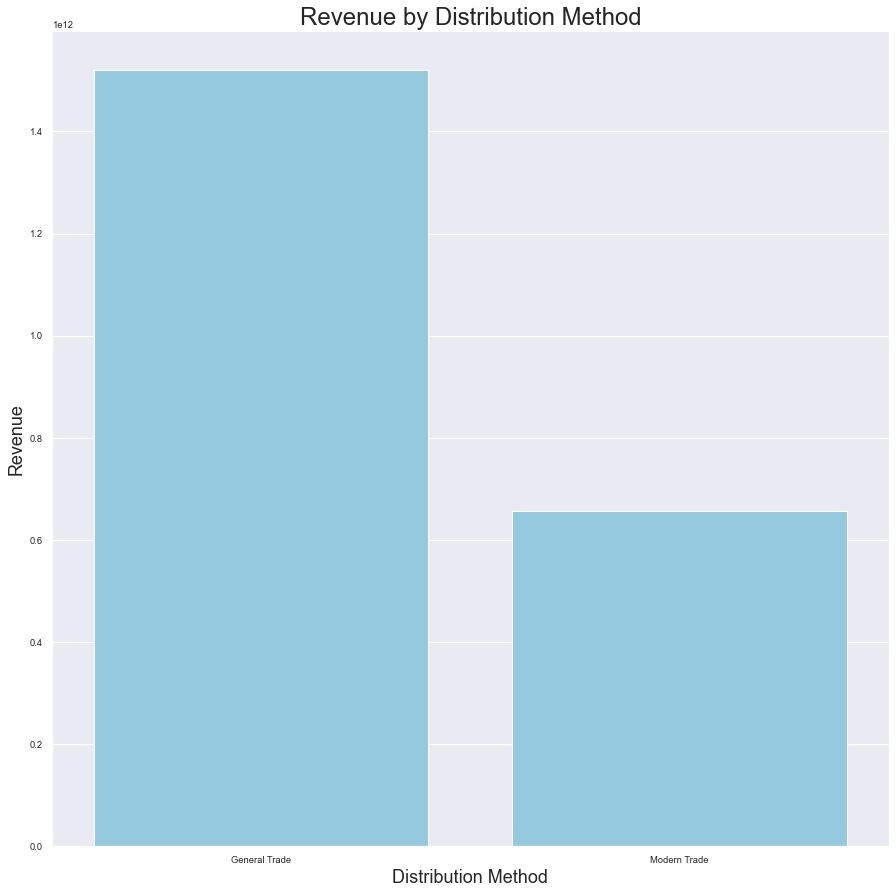

In [626]:
sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(15,15)})
sns.set(font_scale = 0.85)
sns.barplot(x='Distribution Method',
            y="MethodRevenue", 
            data=MethodRevenue, 
            color = 'skyblue')
plt.xticks(rotation=0)
plt.title("Revenue by Distribution Method", fontsize=24)
plt.xlabel('Distribution Method',fontsize=18) 
plt.ylabel('Revenue',fontsize=18)
plt.show()

In [618]:
MethodProfit = TLGdataframe.groupby(['Distribution Method'])\
.agg(MethodProfit = ('Profit', sum)).reset_index()

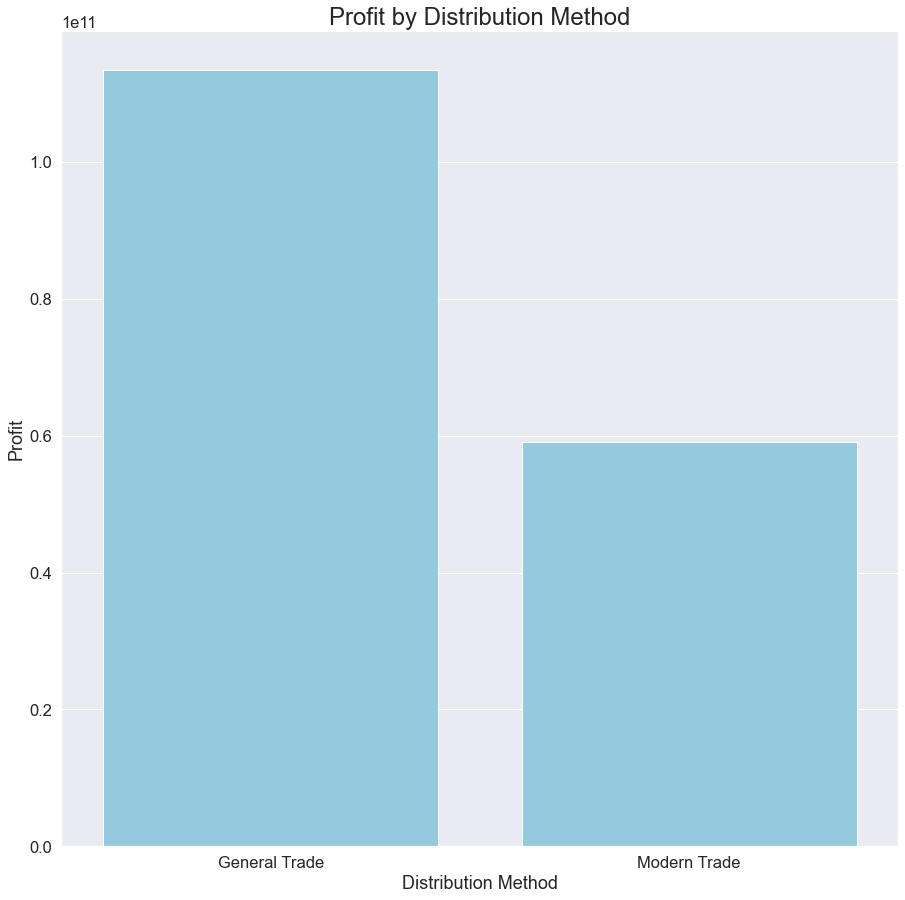

In [627]:
sns.set(font_scale = 1.5)
sns.barplot(x='Distribution Method',
            y="MethodProfit", 
            data=MethodProfit, 
            color = 'skyblue')
plt.xticks(rotation=0)
plt.title("Profit by Distribution Method", fontsize=24)
plt.xlabel('Distribution Method',fontsize=18) 
plt.ylabel('Profit',fontsize=18)
plt.show()

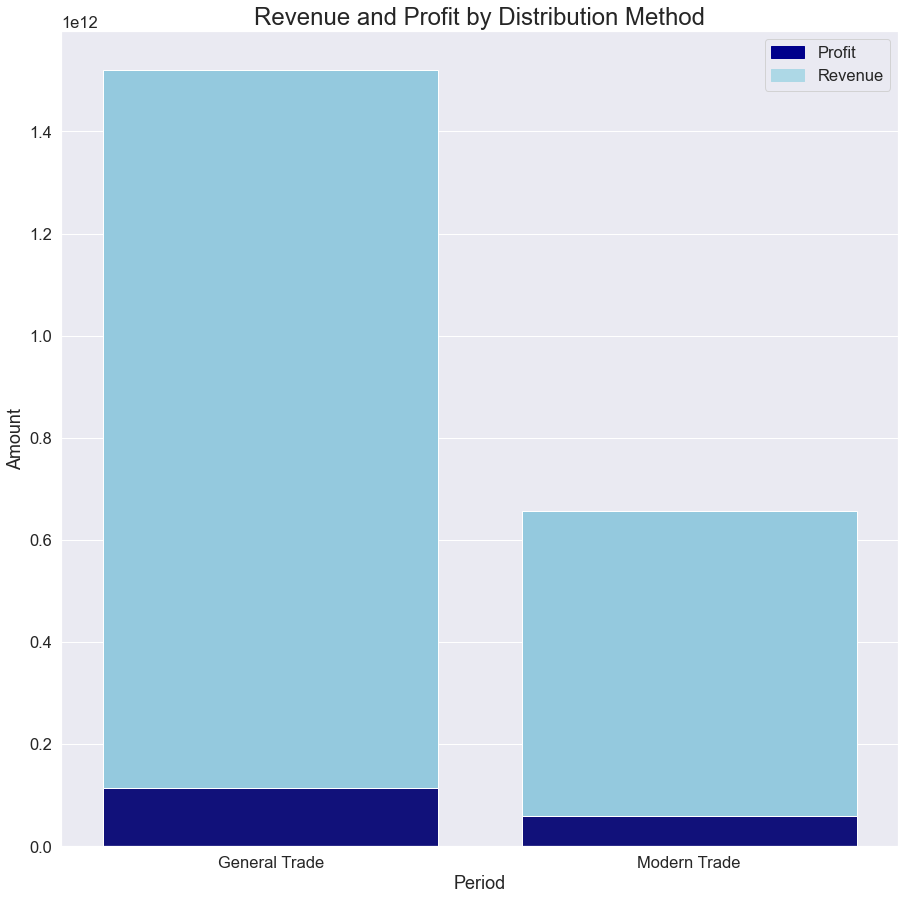

In [625]:
sns.set(rc={'figure.figsize':(15,15)})
sns.set(font_scale = 1.5)
sns.barplot(x='Distribution Method',
            y="MethodRevenue", 
            data=MethodRevenue, 
            color = 'skyblue')
sns.barplot(x='Distribution Method',
            y="MethodProfit", 
            data=MethodProfit, 
            color = 'darkblue')
plt.xticks(rotation=0)
plt.title("Revenue and Profit by Distribution Method", fontsize=24)
plt.xlabel('Period',fontsize=18) 
plt.ylabel('Amount',fontsize=18)
import matplotlib.patches as mpatches
top_bar = mpatches.Patch(color='darkblue', label='Profit')
bottom_bar = mpatches.Patch(color='lightblue', label='Revenue')
plt.legend(handles=[top_bar, bottom_bar])
plt.show()

In [630]:
MethodPercentageProfit = TLGdataframe.groupby(['Distribution Method'])\
.agg(MethodPercentageProfit = ('PercentageProfit', 'mean')).reset_index()
MethodPercentageProfit

,Distribution Method,MethodPercentageProfit
0,General Trade,5.256040
1,Modern Trade,6.455599


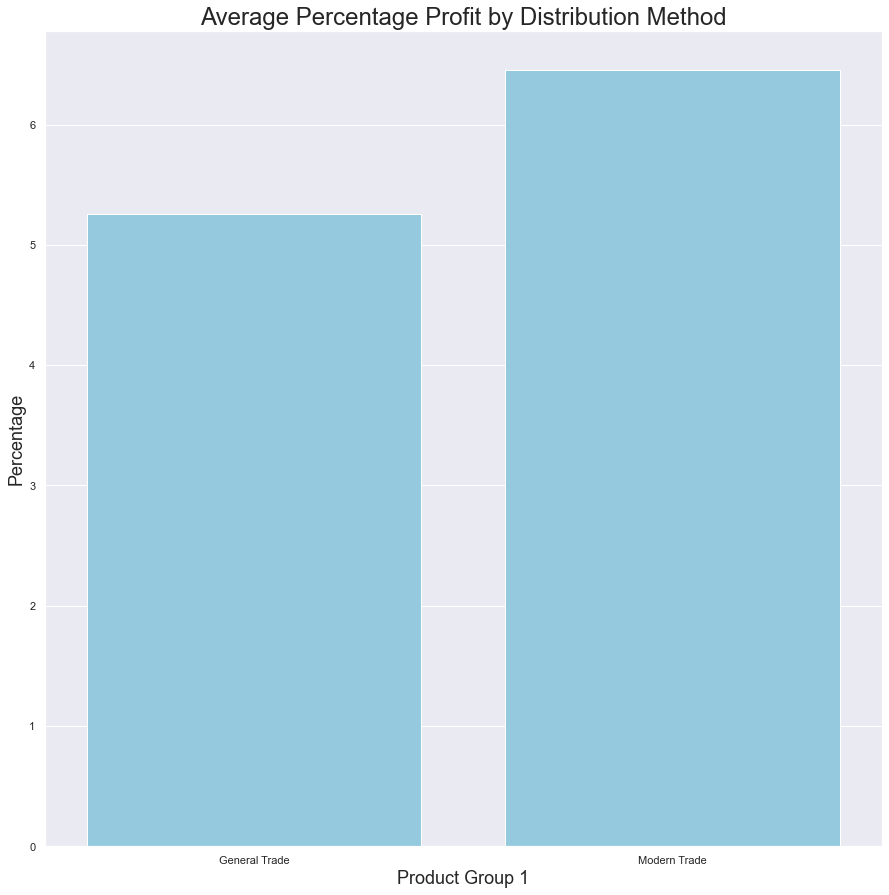

In [624]:
sns.set(font_scale = 1)
sns.barplot(x='Distribution Method',
            y="MethodPercentageProfit", 
            data=MethodPercentageProfit, 
            color = 'skyblue')
plt.xticks(rotation=0)
plt.title("Average Percentage Profit by Distribution Method", fontsize=24)
plt.xlabel('Distribution Method',fontsize=18) 
plt.ylabel('Percentage',fontsize=18)
plt.show()

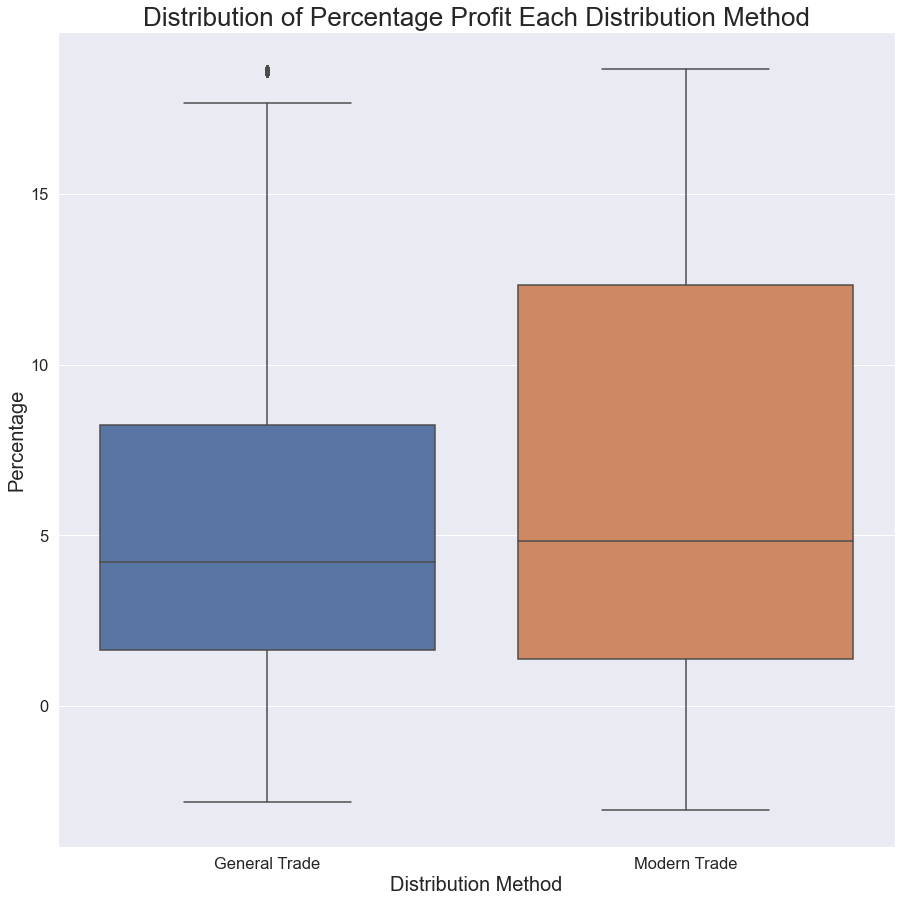

In [629]:
MethodBoxPlot = sns.boxplot(x="Distribution Method", y="PercentageProfit", data=TLGdataframe)
MethodBoxPlot.set_xlabel("Distribution Method", fontsize=20)
MethodBoxPlot.set_ylabel("Percentage", fontsize=20)
MethodBoxPlot.axes.set_title("Distribution of Percentage Profit Each Distribution Method", fontsize=26)
plt.show()

From two plots above, in which displays the average of percentage profit of each distribution group and the boxplot representing the distribution of the percentage, we see a clear difference from these groups. The General Method has the percentage profit of 5.256040% while the Modern Trade reach to 6.455599%. These boxplots are a right-skewed distribution, but we can easily spot the interquartile range of Modern Trade is larger than General Trade's. To test our assumption about the difference, we conduct a Z-test for comparing two means with the null hypothesis is there is no significant difference in the mean percentage between two methods and the alternative hypothesis is there exists a significant difference in the mean percentage.

In [631]:
General_df = TLGdataframe[TLGdataframe['Distribution Method'] == 'General Trade']
Modern_df = TLGdataframe[TLGdataframe['Distribution Method'] == 'Modern Trade']

In [638]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
stests.ztest(General_df['PercentageProfit'], x2=Modern_df['PercentageProfit'], value=0,alternative='two-sided')

(-29.55756501930371, 5.250065128684307e-192)

The p-value of the test is 5.250065128684307e-192, which is much less than the significance level alpha = 0.05. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random). Therefore, we reject the null hypothesis with f statistic is -29.55756501930371 and conclude that there is significant difference in the percentage profit in two distribution method. 